In [186]:
import pandas as pd
import glob
from os.path import basename
import re
import matplotlib.pyplot as plt
import pytz

def get_pair_number(s):   
    # Define the regex pattern
    pattern = re.compile(r'P\d+')
    # Find all matches in the input string
    matches = pattern.findall(s)
    return matches[0] if matches[0] else []


# Firstly load all of the cleaned up prompt files
json_files = glob.glob('./files/clean*.json')

# Initialize an empty list to store DataFrames
dfs = []
# Read each JSON file into a DataFrame and append to the list
for file in json_files:
    pnum= get_pair_number(basename(file))    
    dff = pd.read_json(file)
    dff["pair"] = pnum
    dfs.append(dff)

# Concatenate the list of DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
# Also read in the timings for each pair
df_timings = pd.read_csv('./files/Design Challenge Timings.csv')  



In [187]:

def plot_time_series(df, start_time, pair):
    df['timestamp'] = pd.to_datetime(combined_df['timestamp'], utc=True)  # Convert to datetime with UTC timezone
    timezone_utc = pytz.utc
    timezone_pt = pytz.timezone('America/Los_Angeles')
    df['time_pt'] = combined_df['timestamp'].dt.tz_convert(timezone_pt)

    # Convert the string to a datetime object with PT timezone
    pt_datetime = pd.to_datetime(start_time, format='%m/%d/%Y %H:%M:%S').tz_localize('America/Los_Angeles')
    # Convert the PT datetime to UTC
    utc_datetime = pt_datetime.tz_convert('UTC')

    # Calculate minutes since 1 pm PT
    df['minutes_since_start'] = (df['time_pt'] - utc_datetime).dt.total_seconds() / 60
    prompts_df = df[combined_df.prompt.notnull()]

    fixed_point = 5
    # Create a timeseries plot
    ax = prompts_df.plot(x='minutes_since_start', y=fixed_point, kind='scatter', color='red',  yticks=[])

    # Add lines from each point to the fixed point
    #for index, row in prompts_df.iterrows():
    #    ax.plot([row['minutes_since_start'], row['minutes_since_start']], [0, fixed_point], color='blue', linestyle='--')

    # Set labels and title
    plt.xlabel('Time (minutes)')
    plt.ylabel('')
    plt.title('Time prompts entered for pair {}'.format(pair))
    # Set the x-axis start and end values
    plt.xlim(0, 100)
    plt.xticks(range(0, 100, 10))


In [188]:
def plot_multiple_time_series(df, start_time, pair, y_loc):
    df['timestamp'] = pd.to_datetime(combined_df['timestamp'], utc=True)  # Convert to datetime with UTC timezone
    timezone_utc = pytz.utc
    timezone_pt = pytz.timezone('America/Los_Angeles')
    df['time_pt'] = combined_df['timestamp'].dt.tz_convert(timezone_pt)

    # Convert the string to a datetime object with PT timezone
    pt_datetime = pd.to_datetime(start_time, format='%m/%d/%Y %H:%M:%S').tz_localize('America/Los_Angeles')
    # Convert the PT datetime to UTC
    utc_datetime = pt_datetime.tz_convert('UTC')
    
        # Calculate minutes since 1 pm PT
    df['minutes_since_start'] = (df['time_pt'] - utc_datetime).dt.total_seconds() / 60
    prompts_df = df[combined_df.prompt.notnull()]
    
    if pair =="P10":
        print(prompts_df)

    # Create a timeseries plot
    plt.scatter(prompts_df['minutes_since_start'], [y_loc]*len(prompts_df), label=pair)    

  


                                                prompt  \
174  We would like to design a mobile application. ...   
176  Create a design document for the following req...   
177  We would like to design a mobile application. ...   
180  We would like to design a mobile application. ...   
182  We would like to design a mobile application. ...   
184  We would like to design a mobile application. ...   
185  We would like to design a mobile application. ...   
188  We would like to design a mobile application. ...   
190  We would like to design a mobile application. ...   
192  We would like to design a mobile application. ...   
194  We would like to design a mobile application. ...   
196  We would like to design a mobile application. ...   
198  We would like to design a mobile application. ...   

                           timestamp  prompt_history response  tokens pair  \
174 2023-11-03 22:19:16.325435+00:00             0.0      NaN     NaN  P10   
176 2023-11-03 22:20:57.136183+

/tmp/ipykernel_15137/615972928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(combined_df['timestamp'], utc=True)  # Convert to datetime with UTC timezone
/tmp/ipykernel_15137/615972928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_pt'] = combined_df['timestamp'].dt.tz_convert(timezone_pt)
/tmp/ipykernel_15137/615972928.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

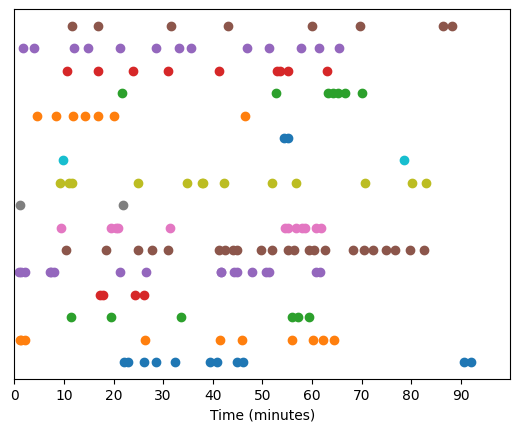

In [189]:
distinct_values = combined_df['pair'].unique()
# Iterate through the combined df and plot the graph for each pair
start_y = 5
for pair in distinct_values:
    
    rows_with_value = combined_df[combined_df['pair'] == pair]
    pair_start_time = df_timings.loc[df_timings['Pair'] == pair, 'First Login to Chat App'].values[0]
    plot_multiple_time_series(rows_with_value, pair_start_time, pair, start_y)
    start_y += 5

plt.xlabel('Time (minutes)')
plt.ylabel('')
# Set the x-axis start and end values
plt.xlim(0, 100)
plt.xticks(range(0, 100, 10))
plt.yticks([])
plt.show()
# Set labels and title
